# Capstone Project - The Battle of the Neighborhoods (Week 2 and 3)
### Applied Data Science Capstone by IBM/Coursera

## Table of contents
* [1. Introduction: Business Problem](#introduction)
* [2. Data](#data)
* [3. Methodology and Analysis](#methodology)
* [4. Results](#analysis)
* [5. Discussion](#results)
* [6. Conclusion](#conclusion)



## 1. Introduction: Business Problem <a name="introduction"></a>

#### Background

**Munich** is the capital and most populous city of Bavaria with a population of 1,558,395 inhabitants as of 31 July 2020. It is the third-largest city in Germany, after Berlin and Hamburg. Munich is a global centre of art, science, technology, finance, publishing, culture, innovation, education, business, and tourism and enjoys a very high standard and quality of living.
Munich's economy is based on high tech, automobiles, the service sector and creative industries, as well as IT, biotechnology, engineering and electronics among many others. Munich's numerous architectural and cultural attractions, sports events, exhibitions and its annual Oktoberfest attract considerable tourism.

In this project we will try to find an optimal location for "Active and Entertainment" hotel in Munich. Hence, a European Hotel Group already located in different major cities in Europe has requested us to find a new spot in Munich.  In order to meet specific client segments the new hotel should meet the following criteria:

**(1) Clients Segments:** 

The hotel should be attractive for "active" people, it means with a clear focus on sports and wellness. The hotels location should also serve with **entertainment and events** nearby. Furthermore, its location should be close to the city center (radius = 5 km). As a second target group families should be welcomed in the hotel as well.

**(2) Hotel facilities:** 

In line with other operative hotels in the Group, the main selling aspect is the **hotel pool** (sometimes on the roof or inside). The hotel pool should be attractive for everyone, active and wellness-oriented people as well as families. A concept with a wellness area like sauna or massage is presented and further gym activities are arranged by the hotel or with third parties.




#### Problem

In order to find a suitable location for the Hotel Group the following target questions were jointly defined with the European Hotel Group: 

(1) In which locations nearby the city center of Munich (radius = 5 km) are situated many **"Art & Entertainments"** venues?

(2) Where are the competitors, it means other **Hotels with Pool Area**, located?

(3) Evaluate and discuss most favourable locations of number (1) and (2).

Since there are a lot locations with "Art & Entertainment" in Munich, we will try to detect locations that are not already crowded with Hotels with Pool Area. We will use internet sources to generate a few most promissing areas based on this criterias. 

## 2. Data <a name="data"></a>

Based on definition of our problem and to adddress the target questions, the following data needs to considered:

* Number of existing art and entertainment facilities, their location and distance to the Munich city center (radius = 5 km)
* Categories of art and entertainment facilities (as an information for further client segmentation of Hotel Group)
* Number of existing Hotels with Pool Area, their location and distance to the Munich city center (radius = 5 km)
* General information about most promissing areas on internet pages based on the criterias


Due to limited data presented on other internet pages, the main source for the data analysis will be Foursquare API. This might be a reliable source for venues and categories matching the criteria (Business Problem). Furthermore, coordinates of the locations are presented in Foursquare API in order to find most promissing areas. 

Different libaries are used to analyse the data. Follow up, the libraries, the extraction and analysis of data in the presented codeing.  


## 3. Methodology and Analysis <a name="methodology"></a>

In this project we will direct our efforts on detecting areas of Munich that have many "Art and Entertainment" locations. We will limit our analysis to area ~5km around city center. The city center is determined with the "Marienplatz", which is the well-known spot in the heart of the city where the most famous town hall is located. Lets explore the city center first, where the "Marienplatz" is placed.

**(A) Explore Munich and "Art and Entertainment" locations**

We will collected the required data: location and type (category) of "Art and Entertainment" within 5km from Munich center (Marienplatz). And explore what kind of "Art and Enttainment" it is (according to Foursquare categorization).

**(B) Defining the Clusters with "Art and Entertainment" locations**

After that, we bring the "Art and Entertainment" locations into different clusters (using k-means clustering) in order to find the most promissing spot for our new hotel. And explore how many different "Art and Entertainment" locations are situated in the different clusters.

**(C) Search for competitors (Hotels with Pool) into the different clusters**

As the clusters for promissing locations are defined, the located competitors will be investigated per cluster. Explore if there are already many hotels with pool established. 

After that, we bring all results together in the section "4. Results" and find the best location for the new hotel.
Lets follow the code...


### (A) Explore Munich and "Art and Entertainment" locations


Get the necessary libraries for doing the job

In [1]:
import pandas as pd # library for data analsysis
import numpy as np # library to handle data in a vectorized manner
from bs4 import BeautifulSoup #not used, as there was no relaible data online
import requests # library to handle requests
import matplotlib.pyplot as plt #plotting library

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

!pip install geopy
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values
    
# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize
from pandas import json_normalize

! pip install folium==0.5.0
import folium # plotting library

# import k-means from clustering stage
from sklearn.cluster import KMeans

Getting the coordinates (according to geopy) for the well-known and most famous city center "Marienplatz" with the address.

In [2]:
address = 'Marienplatz, 80331 München'

geolocator = Nominatim(user_agent="foursquare_agent")
location = geolocator.geocode(address)
lat_center = location.latitude
lon_center = location.longitude
print(lat_center, lon_center)

48.13736145 11.574172059316222


Let's explore the munich city map (with folium)

In [3]:
# create map of Munich (Marienplatz) using latitude and longitude values
map_munich = folium.Map(location=[lat_center, lon_center], zoom_start=13)

# add Marienplatz as a red circle mark
folium.CircleMarker(
    [lat_center, lon_center],
    radius=5,
    popup='Marienplatz',
    fill=True,
    color='red',
    fill_color='red',
    fill_opacity=0.6
    ).add_to(map_munich)    

map_munich #(code removed as folium is not displayed in Github / trusted notebook)

### Foursquare

Now that we have our location for the city center of Munich (Marienplatz), let's use Foursquare API to get info on "Art and Entertainment" locations in Munich. (radius = 5 km)

We're need access for the foursquare developer. By using the internet page https://developer.foursquare.com/docs/build-with-foursquare/categories/ we find the right categories for the search. 


In [4]:
CLIENT_ID = 'S5IGN2IZYUUIJ5NMQMGA5YG4MJG0NA2F2NY3KEI3XOKNX3W2' # your Foursquare ID
CLIENT_SECRET = '3LQFHDAYOBHTTF5F42RVQIQ34AHSBRH12MJKLOFJSGL5AI01' # your Foursquare Secret
ACCESS_TOKEN = 'MMJ4I0VUSS1VG0WWZVCFUOL4PGSUTEURLVQF5OZSCSSKB2EO' # your FourSquare Access Token
VERSION = '20180604'
LIMIT = 100
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: S5IGN2IZYUUIJ5NMQMGA5YG4MJG0NA2F2NY3KEI3XOKNX3W2
CLIENT_SECRET:3LQFHDAYOBHTTF5F42RVQIQ34AHSBRH12MJKLOFJSGL5AI01


In [5]:
category = '4d4b7104d754a06370d81259' # ID "Art and Entertainment" according to Foursquare categories
radius = 5000  #radius in Meter / 5000 = 5 km
url = 'https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&v={}&ll={},{}&oauth_token={}&categoryId={}&radius={}&limit={}'.format(
        CLIENT_ID, CLIENT_SECRET, VERSION, lat_center, lon_center, ACCESS_TOKEN, category, radius, LIMIT)

#### Send the GET Request and examine the results

In [6]:
results0 = requests.get(url).json()

In [7]:
# function that extracts the category of the venue

def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

Clean and filter the results and list the different "Art and Entertainment" locations (named entertain_venues)

In [8]:
# assign relevant part of JSON to venues
venues = results0['response']['groups'][0]['items']

entertain_venues = json_normalize(venues) # flatten JSON

# filter columns 
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng', 'venue.location.postalCode']
entertain_venues = entertain_venues.reindex(columns = filtered_columns)
entertain_venues = entertain_venues.loc[:, filtered_columns]

# filter the category for each row
entertain_venues['venue.categories'] = entertain_venues.apply(get_category_type, axis=1)

# clean columns
entertain_venues.columns = [col.split(".")[-1] for col in entertain_venues.columns]
entertain_venues

,name,categories,lat,lng,postalCode
0,Bayerische Staatsoper,Opera House,48.139639,11.578933,80539
1,Nationaltheater München,Opera House,48.139599,11.579207,80539
2,Kunsthalle München,Art Museum,48.140280,11.576025,80333
3,Jazzbar Vogler,Jazz Club,48.133576,11.577694,80469
4,Residenztheater,Theater,48.140030,11.579444,80539
...,...,...,...,...,...
95,Flamingogehege,Zoo Exhibit,48.099307,11.557896,81543
96,Zentrum Neue Technologien (ZNT),Science Museum,48.129189,11.581350,80538
97,Seebühne im Westpark,Performing Arts Venue,48.123489,11.511789,81377
98,Museum Reich der Kristalle,Museum,48.147874,11.572327,80333


Explore, how many "Art and Entertainment" locations by category are found within 5 km of the city center in Munich.

In [9]:
entertain_venues_count = entertain_venues.groupby(["categories"])["categories"].count().reset_index(name="Count categories")
entertain_venues_count

,categories,Count categories
0,Art Gallery,5
1,Art Museum,9
2,Circus,1
3,Comedy Club,3
4,Concert Hall,7
5,Dance Studio,1
6,Escape Room,3
7,History Museum,5
8,Indie Movie Theater,8
9,Jazz Club,3


Explore, where are these "Art and Entertainment" located. See the map

In [10]:
venues_map_0 = folium.Map(location=[lat_center, lon_center], zoom_start=13) # generate map centred around Marienplatz

# add Marienplatz as a red circle mark
folium.CircleMarker(
    [lat_center, lon_center],
    radius=5,
    popup='Marienplatz',
    fill=True,
    color='red',
    fill_color='red',
    fill_opacity=0.6
    ).add_to(venues_map_0)

# add Art and Entertainment spots to the map as green circle markers
for lat, lon, label in zip(entertain_venues.lat, entertain_venues.lng, entertain_venues.categories):
    folium.CircleMarker(
        [lat, lon],
        radius=3,
        popup=label,
        fill=True,
        color='green',
        fill_color='green',
        fill_opacity=0.6
        ).add_to(venues_map_0)

# display map
venues_map_0 #(code removed as folium is not displayed in Github / trusted notebook)

Looking good. So now we see all the Art and Entertainment locations within 5 kilometers from Marienplatz (Munich), and we see already that the most locations are situated in the city center.

### (B) Defining the Clusters with "Art and Entertainment" locations

Using k-means clustering in order to find the most promissing spot for the new "Active and Entertainment" hotel.

In [11]:
# set number of clusters
kclusters = 6

entertain_venues_clustering = entertain_venues.drop(['name', 'categories', 'postalCode'],  axis=1)
entertain_venues_clustering

#run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(entertain_venues_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([5, 5, 0, 5, 5, 5, 0, 0, 0, 0])

In [12]:
# add clustering labels
entertain_venues.insert(0, 'Cluster Labels', kmeans.labels_)

# sort by clustering labels
entertain_venues = entertain_venues.sort_values(by=['Cluster Labels'], ascending=True)
entertain_venues

,Cluster Labels,name,categories,lat,lng,postalCode
99,0,MUCA Museum of Urban and Contemporary Art,Art Museum,48.136612,11.570098,80331
22,0,Rote Sonne,Music Venue,48.142044,11.570032,80333
23,0,Glyptothek,History Museum,48.146205,11.565614,80333
25,0,Alte Pinakothek,Art Museum,48.148239,11.569921,80333
55,0,Circus Krone,Circus,48.145315,11.550139,80335
...,...,...,...,...,...,...
52,5,Museum Fünf Kontinente,Museum,48.137810,11.585677,80538
56,5,Museum Villa Stuck,Art Museum,48.140576,11.599578,81675
63,5,Drehleier,Comedy Club,48.126036,11.598748,81667
28,5,Museum Lichtspiele,Movie Theater,48.131158,11.587573,81669


In [13]:
# create map with different clustered locations
map_clusters = folium.Map(location=[lat, lon], zoom_start=13)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers for clusters to the map
markers_colors = []
for lat, lon, cat, cluster in zip(entertain_venues['lat'], entertain_venues['lng'], entertain_venues['categories'], entertain_venues['Cluster Labels']):
    label = folium.Popup(str(cat) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters  #(code removed as folium is not displayed in Github / trusted notebook)


**Let's explore, what kind of Art and Entertainment venues are located in the different clusters**

<Figure size 1440x720 with 0 Axes>

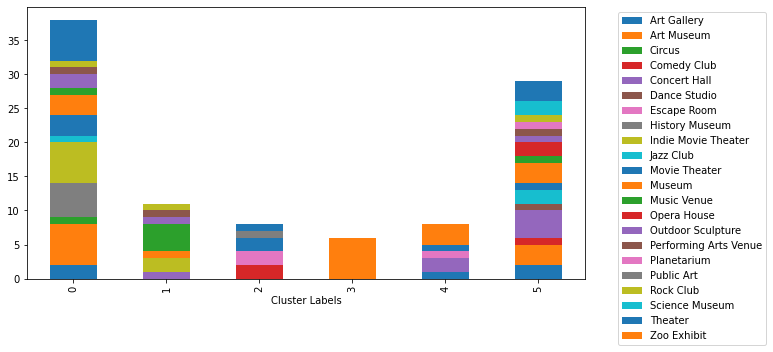

In [14]:
#visualization of Art and Entertainment venues in different clusters
plt.figure(figsize=(20,10))
entertain_venues.groupby('Cluster Labels')["categories"].value_counts().unstack().plot.bar(stacked=True)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.gcf().set_size_inches(10, 5)

In [15]:
entertain_count = entertain_venues.groupby(["Cluster Labels"])["categories"].count().reset_index(name="Count Art & Entertainment")
entertain_count

,Cluster Labels,Count Art & Entertainment
0,0,38
1,1,11
2,2,8
3,3,6
4,4,8
5,5,29


This table and the above map is showing 6 different areas (clusters) of art and entertainment venues nearby the city center (radius = 5km) of Munich. The Art and Entertainment venues are mainly located in Cluster 0 and 5. By now, it could be recommended to open a new hotel with pool favourably in these two areas. The next step will give more information about the competitors in this city areas.

### (C) Search for competitors (Hotels with Pool) into the different clusters

Now that we have our location for the city center of Munich (Marienplatz), let's use Foursquare API to get info on "Hotel with Pool" locations in Munich. (radius = 5 km)

In [16]:
category = '4bf58dd8d48988d15e941735' # ID Hotel with Pool
radius = 5000 #radius in Meter / 5000 = 5 km
url = 'https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&v={}&ll={},{}&oauth_token={}&categoryId={}&radius={}&limit={}'.format(
        CLIENT_ID, CLIENT_SECRET, VERSION, lat, lon, ACCESS_TOKEN, category, radius, LIMIT)

#### Send the GET Request and examine the results

In [17]:
results1 = requests.get(url).json()

In [18]:
# assign relevant part of JSON to venues
venues = results1['response']['groups'][0]['items']
    
hotel_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng', 'venue.location.postalCode']
hotel_venues =hotel_venues.loc[:, filtered_columns]

# filter the category for each row
hotel_venues['venue.categories'] = hotel_venues.apply(get_category_type, axis=1)

# clean columns
hotel_venues.columns = [col.split(".")[-1] for col in hotel_venues.columns]

# it was noted that in the category are also other locations listed (e.g. Pool, Gym, Water Park); 
#clean categories only "Hotel with Pool"
hotel_venues.drop(hotel_venues[hotel_venues['categories'] != "Hotel"].index, inplace=True)
hotel_venues

,name,categories,lat,lng,postalCode
9,Hotel Bayerischer Hof,Hotel,48.140529,11.572938,80333
10,Mandarin Oriental Munich,Hotel,48.137257,11.580779,80331
11,Sofitel Munich Bayerpost,Hotel,48.139459,11.556781,80335
14,Novotel München City,Hotel,48.129655,11.588792,81669
15,Le Méridien München,Hotel,48.138979,11.557947,80335
16,The Charles Hotel,Hotel,48.142935,11.562526,80333
18,Hilton Munich Park,Hotel,48.152339,11.598305,80538
19,Residence Inn Munich City East,Hotel,48.131140,11.607928,81667
21,The Westin Grand München,Hotel,48.152105,11.617253,81925
22,Holiday Inn,Hotel,48.130631,11.589533,81669


In [19]:
venues_map = folium.Map(location=[lat, lon], zoom_start=13) # generate map for hotels with pool venues 

# add Marienplatz as a red circle mark
folium.CircleMarker(
    [lat_center, lon_center],
    radius=5,
    popup='Marienplatz',
    fill=True,
    color='red',
    fill_color='red',
    fill_opacity=0.6
    ).add_to(venues_map)

# add hotels with pool venues
for lat, lon, label in zip(hotel_venues.lat, hotel_venues.lng, hotel_venues.categories):
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        fill=True,
        color='green',
        fill_color='green',
        fill_opacity=0.6
        ).add_to(venues_map)

# display map
venues_map #(code removed as folium is not displayed in Github / trusted notebook)

#### Merge the venues of hotels with pool to the 6 different art and entertainment clusters

In [20]:
#clean table hotel_venues
hotel_venues_clean = hotel_venues.drop(['categories'],  axis=1)

#merge hotel_venues_clean with the entertain_venues_table, following the question, where is the most entertainment by cluster 
#and where are the competitors
entertain_hotel_venues = pd.merge(hotel_venues_clean, entertain_venues.drop(['name', 'categories', 'lat', 'lng'],  axis=1), how="inner", on="postalCode")

#sort the competitors by clusters of entertainment
hotel_venues_cluster = entertain_hotel_venues.drop_duplicates(subset='name', keep="first")

#structure and sort table by clusters
hotel_venues_cluster = hotel_venues_cluster[['Cluster Labels','name','postalCode','lat', 'lng']]
hotel_venues_cluster = hotel_venues_cluster.sort_values(by=['Cluster Labels'], ascending=True)
hotel_venues_cluster

,Cluster Labels,name,postalCode,lat,lng
0,0,Hotel Bayerischer Hof,80333,48.140529,11.572938
17,0,The Charles Hotel,80333,48.142935,11.562526
34,0,Mandarin Oriental Munich,80331,48.137257,11.580779
44,0,Sofitel Munich Bayerpost,80335,48.139459,11.556781
48,0,Le Méridien München,80335,48.138979,11.557947
68,1,Sheraton Munich Westpark Hotel,80339,48.133437,11.532561
71,1,MEININGER Hotel Munich City Center,80339,48.139770,11.545264
52,5,Novotel München City,81669,48.129655,11.588792
53,5,Holiday Inn,81669,48.130631,11.589533
54,5,Living Hotel am Deutschen Museum,81669,48.127584,11.589757


<Figure size 1440x720 with 0 Axes>

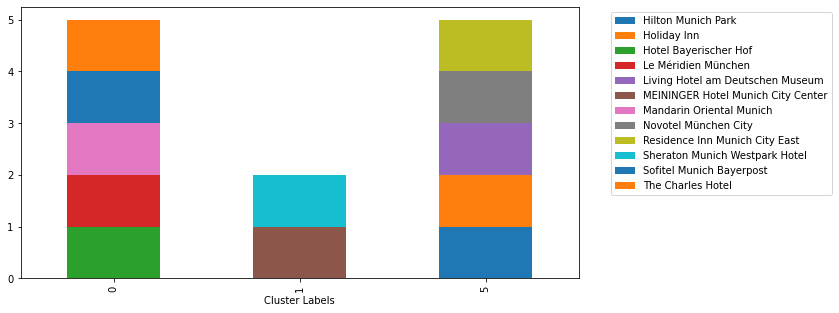

In [21]:
#visualize competitors by 6 different art and entertainment clusters
plt.figure(figsize=(20,10))
hotel_venues_cluster.groupby('Cluster Labels')["name"].value_counts().unstack().plot.bar(stacked=True)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.gcf().set_size_inches(10, 5)

In [22]:
hotel_count = hotel_venues_cluster.groupby(["Cluster Labels"])["Cluster Labels"].count().reset_index(name="Count Hotel with Pool")
hotel_count

,Cluster Labels,Count Hotel with Pool
0,0,5
1,1,2
2,5,5


This table is showing the 12 identified competitors - hotels with pool - sorted by the 6 different areas (cluters) of art and entertainment venues.

Only in 3 of 6 clusters are potential competitors identified, it means in cluster 2, 3 and 4 no hotels with pool are located right now.

## 4. Results <a name="analysis"></a>

In order to find a suitable location for the new hotel with pool of the Hotel Group the following target questions answered in above analysis:

(1) In which locations nearby the city center of Munich (radius = 5 km) take place many "Art & Entertainments" events?

**6 different city areas** were clustered by Art and Entertainment locations and potentially identified for the new hotel.

(2) Where are the competitors, it means other Hotels with Pool Area, located?

**12 potential competitors** were identified and clusted by Art and Entertainment locations.

#### The following map shows the Art and Entertainment locations in the 6 identified areas and the 12 potential competitors

In [23]:
# create map
map_clusters = folium.Map(location=[lat, lon], zoom_start=13)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add clusters for Art and Entertainment by clusters
markers_colors = []
for lat, lon, cat, cluster in zip(entertain_venues['lat'], entertain_venues['lng'], entertain_venues['categories'], entertain_venues['Cluster Labels']):
    label = folium.Popup(str(cat) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)

# add hotels with pool venues in GREEN      
for lat, lon, label in zip(hotel_venues.lat, hotel_venues.lng, hotel_venues.categories):
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        fill=True,
        color='green',
        fill_color='green',
        fill_opacity=0.6
        ).add_to(map_clusters)
       
map_clusters #(code removed as folium is not displayed in Github / trusted notebook)

In [24]:
entertain_hotel_count = pd.merge(entertain_count, hotel_count.astype(int), how="outer", on="Cluster Labels")
entertain_hotel_count

,Cluster Labels,Count Art & Entertainment,Count Hotel with Pool
0,0,38,5.0
1,1,11,2.0
2,2,8,NaN
3,3,6,NaN
4,4,8,NaN
5,5,29,5.0


This table and the above map is showing 6 different areas (clusters) of art and entertainment venues nearby the city center (radius = 5km) of Munich. (short description of identified areas)

**Cluster 0 (see map Art and Entertainment venues in "RED" / and 5 competitors in GREEN):**

Mainly arround the train central station very close to the city center (Marienplatz) and therefore also nearby the pedistrian and shopping areas. As shown in the table above, the main most various area for art and entertainment with 38 venues. 5 competitors are located in this area already.

**Cluster 1 (see map Art and Entertainment venues in "PURPLE" / and 2 competitors in GREEN):**

This cluster represents the west area of the city and includes the location of the annual Oktoberfest. This area is mainly a good living area. 11 venues for art and entertainment and 2 competitors are located in the area.

**Cluster 2 (see map in "BLUE" / no competitors):**

In this area some major universities, the famous park "English Garden" and many nightlife is located on the "Leopoldstraße". (8 art and entertainment venues)

**Cluster 3 (see map in "LIGHT BLUE" / no competitors):**

This is one of the main family areas directly on the city river "Isar", here is the zoo located. (6 family oriented art and entertainment venues)

**Cluster 4 (see map in "LIGHT GREEN" / no competitors):**

The main sport and event area (related 8 art and entertainment venues), which includes the area of the Olympic Games. 

**Cluster 5 (see map in "ORANGE" / and 5 competitors in GREEN):**

This area extends from the city center (Marienplatz) to the east train station. It includes partly the pedistrian and shopping areas and venues for nightlife. Furthermore with 29 art and entertainment venues second in the list. Already 5 competitors are located with their hotel with pool in this area.

## 5. Discussion <a name="results"></a>

Our analysis shows that not that many (12) competitors with hotels with pool are on the market. Especially, the clusters 2, 3 and 4 represent areas with no competitors, but also less Art and Entertainment locations. But nevertheless, depending on the customer segements interesting Art and Entertainment venues:

**Cluster 2: A nice area with relaxing park areas for young and sportive people and families, as well as exciting nightlife for every age group**

**Cluster 3: This area is especially for families a highlight. Maybe less attractive for young people as it is a little far from the city center and less nightlife**

**Cluster 4: This area might be very attractive for sportive people - it means it could be a good area for a sport and wellness hotel. Not that much Art and Entertainment locations and less nightlife**

A new hotel in cluster 1 seems to be not recommended, there are already 2 competitors and also not that much Art and Entertainment venues and furthermore it is mainly a pure living area. 

The areas of cluster 0 and 5 are directly in the city center, of course there are also many Art and Entertainment locations, but already some hotels with pool. The housing prices are very high and the space is narrow. It seems to be recommended to avoid the city center with an "Active and Entertainment" hotel with pool. Even that in the other not that central clusters are less Art and Entertainment venues. This disadvantage could maybe compensated as the public transportation is very good in Munich.

## 6. Conclusion <a name="conclusion"></a>

Purpose of this project was to identify potential areas for an "Active and Entertainment" hotel with pool close to city center with Art and Entertainment venues in order to attract potential clients in the segment mainly "active" people and also families.

By clustering the city on Art and Entertainment locations with Foursquare data, 6 different areas could be identified and analyzed for other competitors. The potential areas with advantages and disadvantes were discussed, but nevertheless the final decision needs to be discussed with the management of the European Hotel Group. Their are different perspectives beside location, such as what housing prices (investment budget) or potential space for the new hotel what needs to be considered as well.
